# Make shots and pass Maps

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import json
# from FCPython import createPitch
from mplsoccer.pitch import Pitch
import seaborn as sns
# from kloppy import datasets
# from soccer_xg import XGModel, DataApi

In [2]:
pitchLengthX=120
pitchWidthY=80

In [3]:
match_id_required = 7580
home_team_required = 'Argentina'
away_team_required = 'France'

In [4]:
file_name = str(match_id_required)+'.json'

In [5]:
with open('/work/friendsof/assets/open-data-master/data/events/'+file_name) as data_file:
#     print(data_file)
    data = json.load(data_file)
    

In [6]:
df = json_normalize(data, sep="_").assign(match_id=file_name[:-5])
# df['type_name'].unique().tolist()
# df.columns.tolist()



In [7]:
shots = df[df['type_name']=='Shot']

Text(96, 1, '@Bucciaratimes')

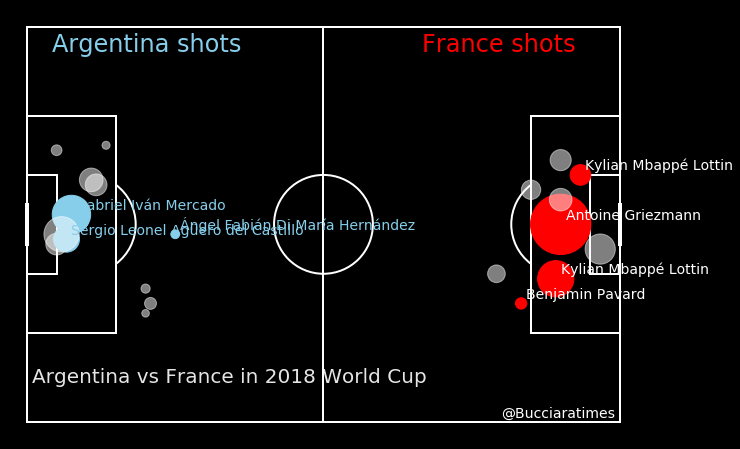

In [8]:
fig, axes = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('black')
axes.patch.set_facecolor('black')

pitch = Pitch(
    pitch_type='statsbomb', 
    orientation='horizontal',
    pitch_color='black',
    line_color='white',
    figsize=(13,8),
    constrained_layout=False, 
    tight_layout=True
)
pitch.draw(ax=axes)

for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
#     circleSize=2
    circleSize=np.sqrt(shot['shot_statsbomb_xg'])*7


    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="skyblue")
            plt.text((pitchLengthX-x+1),y+1,shot['player_name'], color='skyblue', fontsize='14') 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="white")     
            shotCircle.set_alpha(.5)
        
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red") 
            plt.text((x+1),pitchWidthY-y+1,shot['player_name'],color='white', fontsize='14') 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="white")      
            shotCircle.set_alpha(.5)    
    axes.add_patch(shotCircle)
plt.gca().invert_yaxis()

plt.text(80,75,away_team_required + ' shots',color='red',fontsize=24) 
plt.text(5,75,home_team_required + ' shots', color='skyblue',fontsize=24)
plt.text(1,8, 'Argentina vs France in 2018 World Cup' , color='white', fontsize=20, alpha=0.9)
plt.text(96,1, '@Bucciaratimes', color='white',fontsize=14) 
# fig.savefig('/work/output/argen_france_shots.png') 

In [9]:
# pss['player_name'].tolist()
# df['type_name'].unique().tolist()

In [10]:
shots = df[df['type_name']=='Shot'].set_index('id')
passes = df[df['type_name']=='Pass'].set_index('id')
dispossessed = df[df['type_name']=='Dispossessed'].set_index('id')
carry = df[df['type_name']=='Carry'].set_index('id')
dribble = df[df['type_name']=='Dribble'].set_index('id')
dribble_past = df[df['type_name']=='Dribbled Past'].set_index('player_name')
ball_receipt = df[(df['type_name']=='Ball Receipt*')|(df['ball_receipt_outcome_name']=='Incomplete')].set_index('id')
# df['player_name'].dropna().unique().tolist()
passes

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,...,pass_shot_assist,goalkeeper_body_part_id,goalkeeper_body_part_name,50_50_outcome_id,50_50_outcome_name,ball_recovery_offensive,goalkeeper_technique_id,goalkeeper_technique_name,shot_one_on_one,match_id
id,,,,,,,,,,,,,,,,,,,,,
297180ed-6ff2-4e49-8ff8-510ff6882abe,5,1,00:00:01.880,0,1,2,2.040,30,Pass,771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7580
44eb284e-83fe-4b47-bfe3-ca7eaecfa5bd,8,1,00:00:06.440,0,6,2,2.206,30,Pass,771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7580
82596ed1-66cc-475f-bcf0-e484967f49c0,11,1,00:00:47.040,0,47,3,2.720,30,Pass,779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7580
abda3dfe-e021-4eb9-98e6-4dfdb915f528,16,1,00:00:50.480,0,50,4,1.040,30,Pass,771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7580
c70beba2-e7c2-4fa3-99d2-de691150bac2,20,1,00:00:52.440,0,52,4,1.466,30,Pass,771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e2af9dc0-c5cd-4997-82f1-2345f81d725d,3529,2,00:49:37.080,94,37,163,1.680,30,Pass,779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7580
2ec03d59-6118-4369-b7d0-577bada3131f,3533,2,00:49:44.120,94,44,163,2.280,30,Pass,779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7580
3a35664f-547e-48c8-ad7c-79b8b5e7d37e,3537,2,00:49:49.000,94,49,163,1.120,30,Pass,779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7580


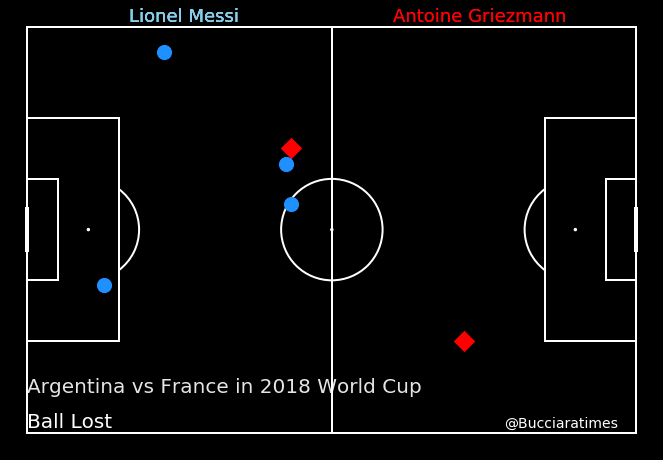

In [11]:
fig, axes = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('black')
axes.patch.set_facecolor('black')

pitch = Pitch(
    pitch_type='statsbomb', 
    orientation='horizontal',
    pitch_color='black',
    line_color='white',
    figsize=(13,8),
    constrained_layout=False, 
    tight_layout=True
)
pitch.draw(ax=axes)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()


for idn, dp in dispossessed.iterrows():
    player_name = dp['player_name']
    
    if player_name == 'Lionel Andrés Messi Cuccittini':
        x = dp['location'][0]
        y = dp['location'][1]
        plt.plot(x,y,color='skyblue')
        plt.scatter(x,y, color='dodgerblue',s=200)
        plt.text(100,81, 'Lionel Messi', color='skyblue',fontsize=18)
        
        
    if player_name == 'Antoine Griezmann':
        x = dp['location'][0]
        y = dp['location'][1]
        plt.plot(x,y,color='red')
        plt.scatter(x,y, color='red',s=200, marker='D')
        plt.text(48,81, player_name, color='red',fontsize=18)
        
# passArrow = plt.Arrow(0,68,50,0,width=1,color="skyblue")
# plt.text(30,70,'Argentina',color='skyblue', fontsize='18') 


# axes.add_patch(passArrow)


# plt.title('Messi vs Griezmann ( in Russia-World-Cup )', color='white', size=20) 
plt.text(120,1, 'Ball Lost' , color='white', fontsize=20)
plt.text(120,8, 'Argentina vs France in 2018 World Cup' , color='white', fontsize=20, alpha=0.9)
plt.text(26,1, '@Bucciaratimes', color='white',fontsize=14) 
# plt.tight_layout()
plt.subplots_adjust(top=0.9) 
fig.savefig('/work/output/messi_griez_lost.png')    


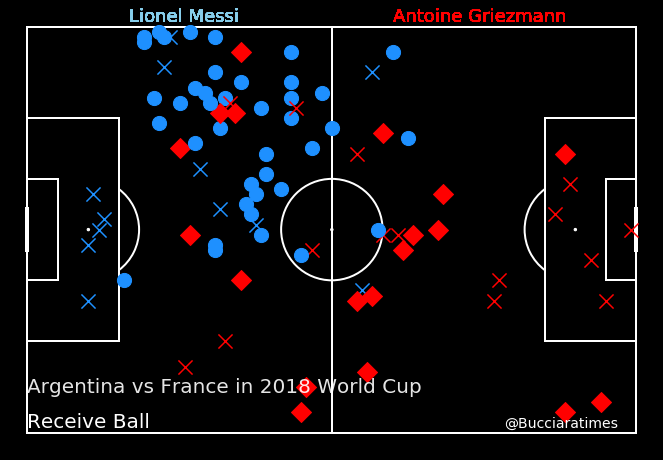

In [12]:
fig, axes = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('black')
axes.patch.set_facecolor('black')

pitch = Pitch(
    pitch_type='statsbomb', 
    orientation='horizontal',
    pitch_color='black',
    line_color='white',
    figsize=(13,8),
    constrained_layout=False, 
    tight_layout=True
)
pitch.draw(ax=axes)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()


for idn, br in ball_receipt.iterrows():
    player_name = br['player_name']
    outcome = br['ball_receipt_outcome_name']
    
    if player_name == 'Lionel Andrés Messi Cuccittini':
        x = br['location'][0]
        y = br['location'][1]
        if outcome == 'Incomplete':
            plt.plot(x,y,color='skyblue')
            plt.scatter(x,y, color='dodgerblue',s=200, marker='x')
        else:
            plt.plot(x,y,color='skyblue')
            plt.scatter(x,y, color='dodgerblue',s=200)
        plt.text(100,81, 'Lionel Messi', color='skyblue',fontsize=18)
        
        
        
    if player_name == 'Antoine Griezmann':
        x = br['location'][0]
        y = br['location'][1]
        if outcome == 'Incomplete':
            plt.plot(120-x,80-y,color='red')
            plt.scatter(120-x,80-y, color='red',s=200, marker='x')
        else:
            plt.plot(120-x,80-y,color='red')
            plt.scatter(120-x,80-y, color='red',s=200, marker='D')
        
        plt.text(48,81, player_name, color='red',fontsize=18)
        
        

# plt.title('Messi vs Griezmann ( in Russia-World-Cup )', color='white', size=20) 
plt.text(120,1, 'Receive Ball' , color='white', fontsize=20)
plt.text(120,8, 'Argentina vs France in 2018 World Cup' , color='white', fontsize=20, alpha=0.9)
plt.text(26,1, '@Bucciaratimes', color='white',fontsize=14) 
# plt.tight_layout()
plt.subplots_adjust(top=0.9) 
fig.savefig('/work/output/messi_griez_receipt_outcome.png')    

In [13]:
messi = df[df['player_name']=='Lionel Andrés Messi Cuccittini']
# messi['dribble_outcome_name'].dropna()
# dribble['dribble_outcome_name']

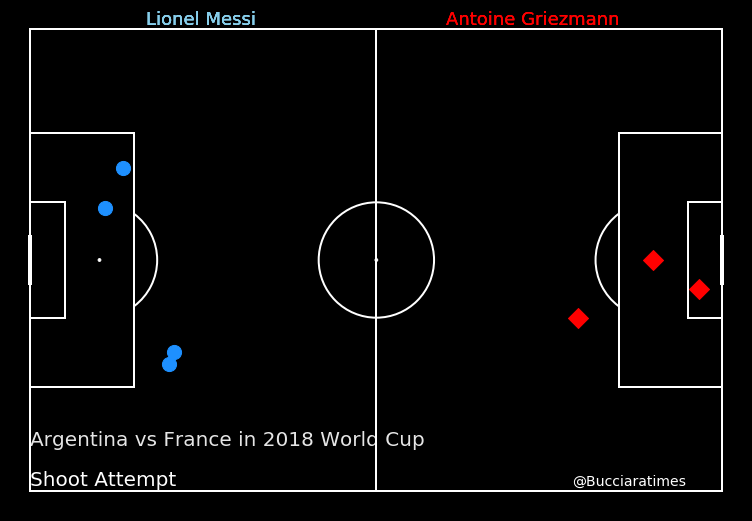

In [15]:
fig, axes = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('black')
axes.patch.set_facecolor('black')

pitch = Pitch(
    pitch_type='statsbomb', 
    orientation='horizontal',
    pitch_color='black',
    line_color='white',
    figsize=(13,8),
    constrained_layout=False, 
    tight_layout=True
)
pitch.draw(ax=axes)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()


for idn, st in shots.iterrows():
    player_name = st['player_name']
    
    if player_name == 'Lionel Andrés Messi Cuccittini':
        x = st['location'][0]
        y = st['location'][1]
        plt.plot(x,y,color='skyblue')
        plt.scatter(x,y, color='dodgerblue',s=200)
        plt.text(100,81, 'Lionel Messi', color='skyblue',fontsize=18)
        
        
        
    if player_name == 'Antoine Griezmann':
        x = st['location'][0]
        y = st['location'][1]
        plt.plot(120-x,80-y,color='red')
        plt.scatter(120-x,80-y, color='red',s=200, marker='D')
        plt.text(48,81, player_name, color='red',fontsize=18)
        
        

# plt.title('Messi vs Griezmann ( in Russia-World-Cup )', color='white', size=20) 
plt.text(120,1, 'Shoot Attempt' , color='white', fontsize=20)
plt.text(120,8, 'Argentina vs France in 2018 World Cup' , color='white', fontsize=20, alpha=0.9)
plt.text(26,1, '@Bucciaratimes', color='white',fontsize=14) 
plt.tight_layout()
plt.subplots_adjust(top=0.9) 
fig.savefig('/work/output/messi_griez_shots.png')    


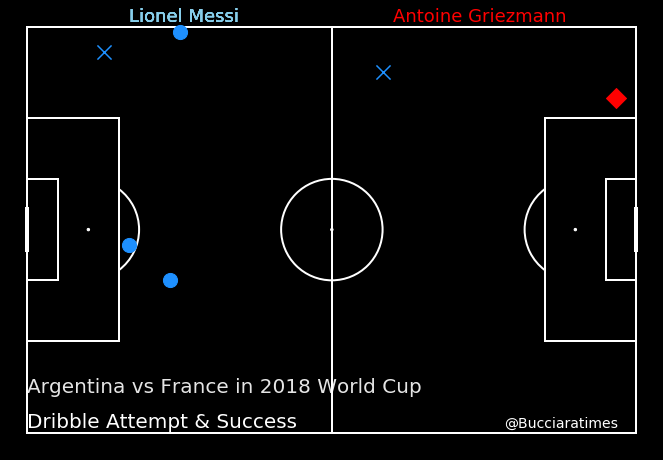

In [16]:
fig, axes = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('black')
axes.patch.set_facecolor('black')

pitch = Pitch(
    pitch_type='statsbomb', 
    orientation='horizontal',
    pitch_color='black',
    line_color='white',
    figsize=(13,8),
    constrained_layout=False, 
    tight_layout=True
)
pitch.draw(ax=axes)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()


for idn, db in dribble.iterrows():
    player_name = db['player_name']
    outcome = db['dribble_outcome_name']
    if player_name == 'Lionel Andrés Messi Cuccittini':
        x = db['location'][0]
        y = db['location'][1]
        if outcome == 'Incomplete':
            plt.plot(x,y,color='skyblue')
            plt.scatter(x,y, color='dodgerblue',s=200, marker='x')
        else:
            plt.plot(x,y,color='skyblue')
            plt.scatter(x,y, color='dodgerblue',s=200)
        plt.text(100,81, 'Lionel Messi', color='skyblue',fontsize=18)
        
        
        
    if player_name == 'Antoine Griezmann':
        x = db['location'][0]
        y = db['location'][1]
        if outcome == 'Incomplete':
            plt.plot(x,y,color='skyblue')
            plt.scatter(x,y, color='dodgerblue',s=200, marker='x')
        else:
            plt.plot(120-x,y,color='red')
            plt.scatter(120-x,y, color='red',s=200,marker='D')
        plt.text(48,81, player_name, color='red',fontsize=18)
        
        

# plt.title('Messi vs Griezmann ( in Russia-World-Cup )', color='white', size=20) 
plt.text(120,1, 'Dribble Attempt & Success' , color='white', fontsize=20)
plt.text(120,8, 'Argentina vs France in 2018 World Cup' , color='white', fontsize=20, alpha=0.9)
plt.text(26,1, '@Bucciaratimes', color='white',fontsize=14) 
# plt.tight_layout()
plt.subplots_adjust(top=0.9) 
fig.savefig('/work/output/messi_griez_dribble.png')    


In [17]:
# fig, axes = plt.subplots(figsize=(13.5, 8))
# fig.set_facecolor('black')
# axes.patch.set_facecolor('black')

# pitch = Pitch(
#     pitch_type='statsbomb', 
#     orientation='horizontal',
#     pitch_color='black',
#     line_color='white',
#     figsize=(13,8),
#     constrained_layout=False, 
#     tight_layout=True
# )
# pitch.draw(ax=axes)
# plt.gca().invert_yaxis()

# for idn, ps in pss.iterrows():
#     x = ps['location'][0]
#     y = ps['location'][1]
#     team_name=ps['team_name']
#     circleSize=3
#     player_name=ps['player_name']
#     pass_length=ps['pass_length']
    
#     if team_name == home_team_required:
#         if player_name=='Lionel Andrés Messi Cuccittini':
#             a = plt.plot((x,pitchWidthY-y), color='skyblue')
#             plt.scatter(x,pitchWidthY-y, color='dodgerblue')
        
#     elif team_name == away_team_required:
#         if player_name=='Antoine Griezmann':
#             a=plt.plot((pitchLengthX-x,y),color="red") 
#             plt.scatter(x,pitchWidthY-y, color='red')



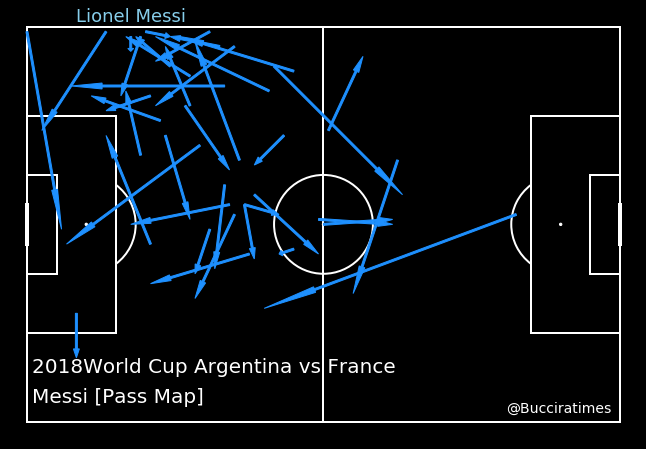

In [18]:
fig, axes = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('black')
axes.patch.set_facecolor('black')

pitch = Pitch(
    pitch_type='statsbomb', 
    orientation='horizontal',
    pitch_color='black',
    line_color='white',
    figsize=(13,8),
    constrained_layout=False, 
    tight_layout=True
)
pitch.draw(ax=axes)


for idn, thepass in passes.iterrows():
    team_name=thepass['team_name']
    circleSize=3
    player_name=thepass['player_name']
    
    if thepass['player_name']=='Lionel Andrés Messi Cuccittini':          
        x=thepass['location'][0]
        y=thepass['location'][1]
        dx=thepass['pass_end_location'][0]-x
        dy=thepass['pass_end_location'][1]-y
        passArrow=plt.Arrow(x,pitchWidthY-y,dx,-dy,width=2,color='dodgerblue')
        axes.add_patch(passArrow)
        

#     if player_name=='Antoine Griezmann':
#             x=thepass['location'][0]
#             y=thepass['location'][1]
#             dx=thepass['pass_end_location'][0]-x
#             dy=thepass['pass_end_location'][1]-y
#             passArrow=plt.Arrow(x,pitchWidthY-y,dx,-dy,width=2,color='red')
    
# plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# plt.text(5,75,'Antoine Griezmann',color='red',fontsize=18) 
plt.text(110,-1,'Lionel Messi', color='skyblue',fontsize=18)
plt.text(23,78, '@Bucciratimes', color='white',fontsize=14) 
plt.text(119,70, '2018World Cup Argentina vs France', color='white',fontsize=20) 
plt.text(119,76, 'Messi [Pass Map]', color='white',fontsize=20) 

fig.savefig('/work/output/messi_france_passmap.png')    
#     fig.savefig('/work/output/messi_griez_pass.pdf', dpi=100) 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


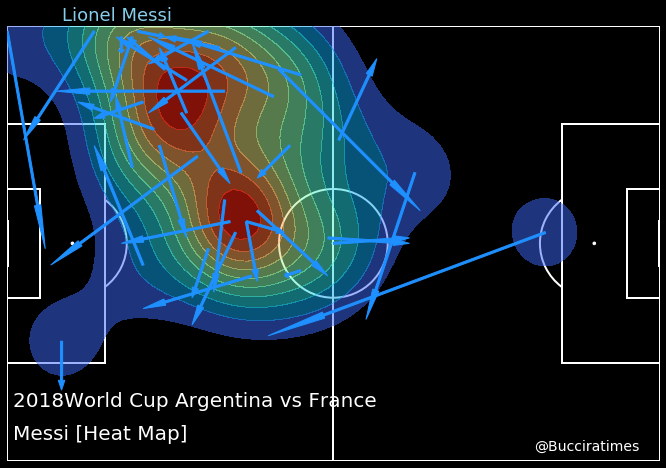

In [19]:
fig, axes = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('black')
axes.patch.set_facecolor('black')

pitch = Pitch(
    pitch_type='statsbomb', 
    orientation='horizontal',
    pitch_color='black',
    line_color='white',
    figsize=(13,8),
    constrained_layout=False, 
    tight_layout=True
)
pitch.draw(ax=axes)


messi = df[df['player_name']=='Lionel Andrés Messi Cuccittini']
messi_df = messi[['location', 'pass_end_location']]

messi_df = messi_df.dropna()

location_x = []
location_y = []
location_dx = []
location_dy = []

 
for i, row in messi_df.iterrows():
    location_x.append(row['location'][0])
    location_y.append(pitchWidthY - row['location'][1]) 
    location_dx.append(row['pass_end_location'][0]-row['location'][0])                   
    location_dy.append(-row['pass_end_location'][1]-row['location'][1])                   
    
    
messi_df['location_x'] = location_x
messi_df['location_y'] = location_y 
messi_df['location_dx'] = location_dx
messi_df['location_dy'] = location_dy

messi_df = messi_df.drop(['location'], axis=1)
messi_df = messi_df.drop(['pass_end_location'], axis=1)



#Create the heatmap
kde = sns.kdeplot(
        data = messi_df,
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'rainbow'
)


#use a for loop to plot each pass

for idn, thepass in passes.iterrows():
    team_name=thepass['team_name']
    circleSize=3
    player_name=thepass['player_name']
    
    if thepass['player_name']=='Lionel Andrés Messi Cuccittini':   
        x=thepass['location'][0]
        y=thepass['location'][1] 
        dx=thepass['pass_end_location'][0]-x 
        dy=thepass['pass_end_location'][1]-y
        passArrow=plt.Arrow(x,pitchWidthY-y,dx,-dy,width=2,color='dodgerblue')
        axes.add_patch(passArrow)
      
        

# plt.tight_layout()
plt.xlim(0,120)
plt.ylim(0,80)


plt.gca().invert_xaxis()
plt.gca().invert_yaxis()



plt.text(110,-1,'Lionel Messi', color='skyblue',fontsize=18)
plt.text(23,78, '@Bucciratimes', color='white',fontsize=14) 
plt.text(119,70, '2018World Cup Argentina vs France', color='white',fontsize=20) 
plt.text(119,76, 'Messi [Heat Map]', color='white',fontsize=20) 

fig.savefig('/work/output/messi_france_heatmap.png')

In [20]:
messi = df[df['player_name']=='Lionel Andrés Messi Cuccittini']
messi_df = messi[['location','minute']]

# messi_df = messi_df.drop('location', axis=1)
location_x = []
location_y = []
messi_df
for i, row in messi_df.iterrows():
    location_x.append(row['location'][0])
    location_y.append(row['location'][1])                   
    
messi_df['location_x'] = location_x
messi_df['location_y'] = location_y
messi_df = messi_df.drop(['location'], axis=1)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
fig, axes = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('black')
axes.patch.set_facecolor('black')

pitch = Pitch(
    pitch_type='statsbomb', 
    orientation='horizontal',
    pitch_color='black',
    line_color='white',
    figsize=(13,8),
    constrained_layout=False, 
    tight_layout=True
)
pitch.draw(ax=axes)

gri = df[df['player_name']=='Antoine Griezmann']
gri_df = gri[['location','pass_end_location']]

gri_df = gri_df.dropna()

location_x = []
location_y = []
location_dx = []
location_dy = []

for i, row in gri_df.iterrows():
    location_x.append(row['location'][0])
    location_y.append(pitchWidthY - row['location'][1]) 
    location_dx.append(row['pass_end_location'][0]-row['location'][0])                   
    location_dy.append(-row['pass_end_location'][1]-row['location'][1])              
    
gri_df['location_x'] = location_x
gri_df['location_y'] = location_y 
gri_df['location_dx'] = location_dx
gri_df['location_dy'] = location_dy 
    
gri_df = gri_df.drop(['location'], axis=1)
gri_df = gri_df.drop(['pass_end_location'], axis=1)



#Create the heatmap
kde = sns.kdeplot(
        data = gri_df,
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap='rainbow'
#         cmap = 'crest'
    
)


#use a for loop to plot each pass

for idn, thepass in passes.iterrows():
    team_name=thepass['team_name']
    circleSize=3
    player_name=thepass['player_name']
    
    if thepass['player_name']=='Antoine Griezmann':   
        x=thepass['location'][0]
        y=thepass['location'][1] 
        dx=thepass['pass_end_location'][0]-x 
        dy=thepass['pass_end_location'][1]-y
        passArrow=plt.Arrow(x,pitchWidthY-y,dx,-dy,width=2,color='dodgerblue')
        axes.add_patch(passArrow)
      
        

# plt.tight_layout()
plt.xlim(0,120)
plt.ylim(0,80)


plt.gca().invert_xaxis()
plt.gca().invert_yaxis()



plt.text(110,-1,'Antoine Griezmann', color='skyblue',fontsize=18)
plt.text(23,78, '@Bucciratimes', color='white',fontsize=14) 
plt.text(119,70, '2018World Cup Argentina vs France', color='white',fontsize=20) 
plt.text(119,76, 'Antoine Griezmann [Heat Map]', color='white',fontsize=20) 

fig.savefig('/work/output/griezman_france_heatmap.png')

In [ ]:
# fig, axes = plt.subplots(figsize=(13.5, 8))
# fig.set_facecolor('black')
# axes.patch.set_facecolor('black')

# pitch = Pitch(
#     pitch_type='statsbomb', 
#     orientation='horizontal',
#     pitch_color='black',
#     line_color='white',
#     figsize=(13,8),
#     constrained_layout=False, 
#     tight_layout=True
# )
# pitch.draw(ax=axes)
# #Tidy Axes
# plt.axis('off')



# sns.kdeplot(messi_df["location_x"],messi_df["location_y"], shade=True)
# plt.ylim(0, 90)
# plt.xlim(0, 130)


    

    
# # plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()

# # plt.text(5,75,'Antoine Griezmann',color='red',fontsize=18) 
# # plt.text(80,75,'Lionel Messi', color='skyblue',fontsize=18)
# plt.text(100,-2, '@Buccirati', color='skyblue',fonAntoine Griezmanntsize=14) 
# plt.text(1,-2, '2018World Cup France vs Argentina', color='skyblue',fontsize=14) 

# plt.show()


In [ ]:
from matplotlib.patches import Arc
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

sns.kdeplot(messi_df['location_x'],messi_df['location_y'],shade=True,n_levels=50,cmap='Blues')
sns.kdeplot(gri_df['location_x'],gri_df['location_y'],shade=True, alpha=0.3,n_levels=50, cmap='Reds')

plt.ylim(0, 90)
plt.xlim(0, 130)

plt.gca().invert_xaxis()

#Display Pitch
plt.text(-100,5, '@Buccirati', color='skyblue',fontsize=14) 
plt.text(-100,2, '2018World Cup France vs Argentina', color='skyblue',fontsize=14) 

plt.show()
fig.savefig('/work/output/heatmap.png')    


In [ ]:
for idn, thepass in passes.iterrows():
    team_name=thepass['team_name']
    circleSize=3
    player_name=thepass['player_name']
    
    if thepass['player_name']=='Lionel Andrés Messi Cuccittini':   
        x=thepass['location'][0]
        y=thepass['location'][1]
        dx=thepass['pass_end_location'][0]-x
        dy=thepass['pass_end_location'][1]-y
        print(x,y,dx,dy)

In [ ]:
messi_df['pass_end_location']

In [ ]:
messi_df = messi_df.reset_index(drop=True)

In [ ]:
messi_df